In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
# Generate datetime index for the past 5 years with hourly frequency
end_date = datetime.now()
start_date = end_date - timedelta(days=5*365)
date_range = pd.date_range(start=start_date, end=end_date, freq='H')
# Generate random load values for each region
np.random.seed(42)
region1_load = np.random.randint(50, 200, size=len(date_range))
region2_load = np.random.randint(40, 190, size=len(date_range))
region3_load = np.random.randint(60, 210, size=len(date_range))
# Create a DataFrame
df = pd.DataFrame({
    'region1': region1_load,
    'region2': region2_load,
    'region3': region3_load
}, index=date_range)
# Display the first few rows of the DataFrame
df.head()

In [ ]:
# Filter out rows with hours not in the range 8-23
filtered_df = df.between_time('08:00', '23:00')
# Display the first few rows of the filtered DataFrame
filtered_df.head()

In [ ]:
# Remove all data from the year 2020
filtered_df = filtered_df[filtered_df.index.year != 2020]
# Display the first few rows of the updated DataFrame
filtered_df.head()

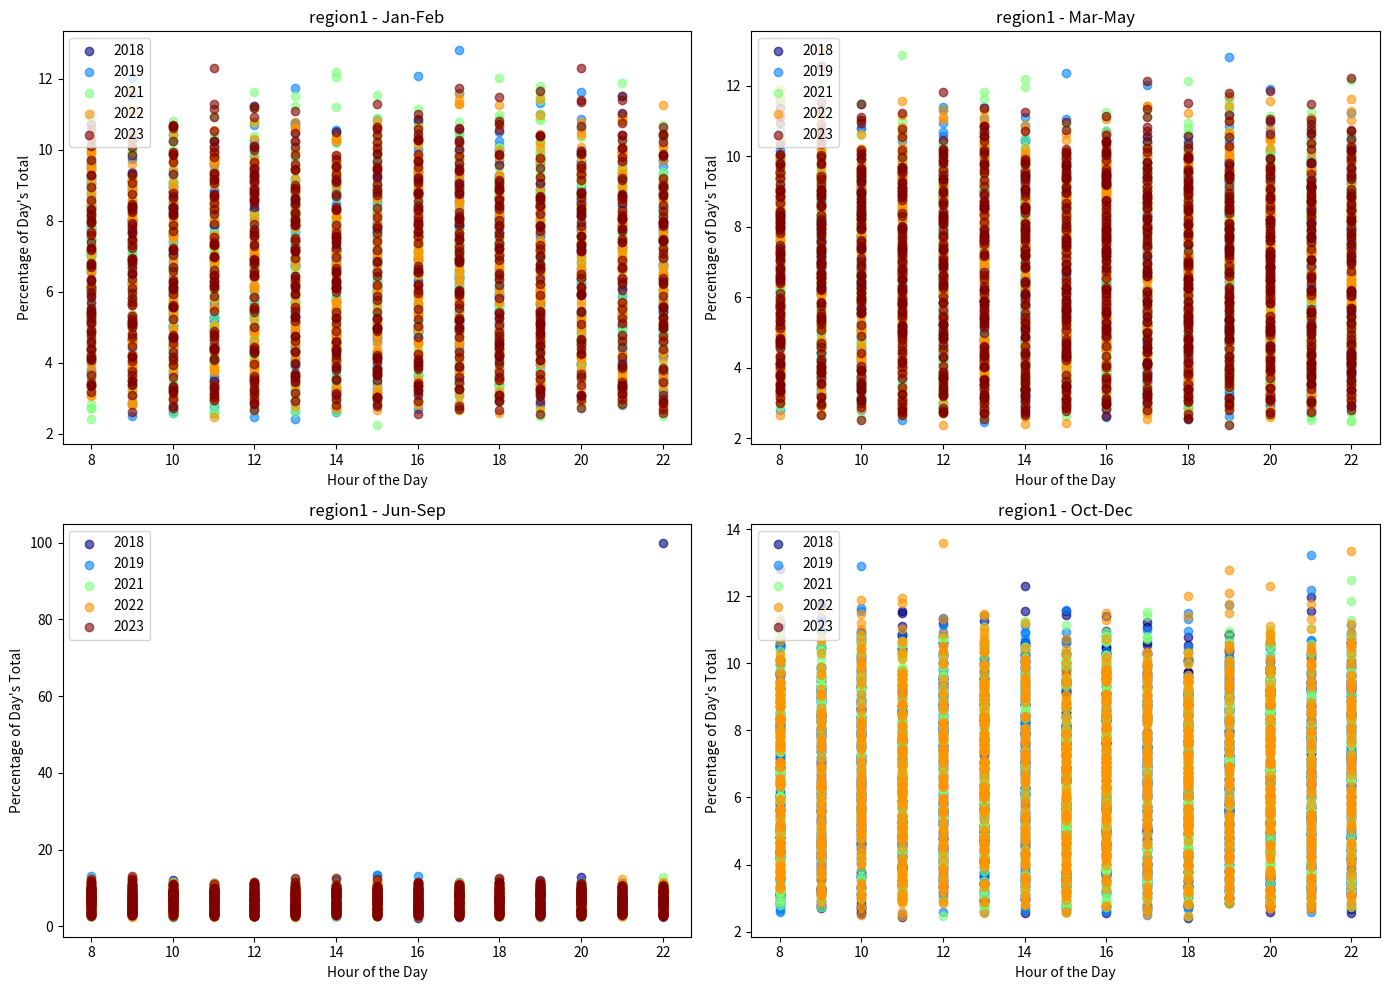

In [ ]:
import matplotlib.pyplot as plt
def plot_region_data(region_name, df):
    # Define month ranges for each graph
    month_ranges = [
        ('Jan-Feb', [1, 2]),
        ('Mar-May', [3, 4, 5]),
        ('Jun-Sep', [6, 7, 8, 9]),
        ('Oct-Dec', [10, 11, 12])
    ]
    # Define colors for different years
    years = df.index.year.unique()
    colors = plt.cm.jet(np.linspace(0, 1, len(years)))
    year_color_map = dict(zip(years, colors))
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
    axes = axes.ravel()
    for i, (label, months) in enumerate(month_ranges):
        ax = axes[i]
        for year in years:
            subset = df[(df.index.year == year) & (df.index.month.isin(months))]
            # Calculate percentage of day's total for each hour
            daily_totals = subset.resample('D').sum()[region_name]
            hourly_percentage = (subset[region_name] / subset.index.to_series().dt.date.map(daily_totals)) * 100
            ax.scatter(subset.index.hour, hourly_percentage, label=str(year), color=year_color_map[year], alpha=0.6)
        ax.set_title(f'{region_name} - {label}')
        ax.set_xlabel('Hour of the Day')
        ax.set_ylabel('Percentage of Day\'s Total')
        ax.legend(loc='upper left')
    plt.tight_layout()
    plt.show()
# Test the function for region1
plot_region_data('region1', filtered_df)

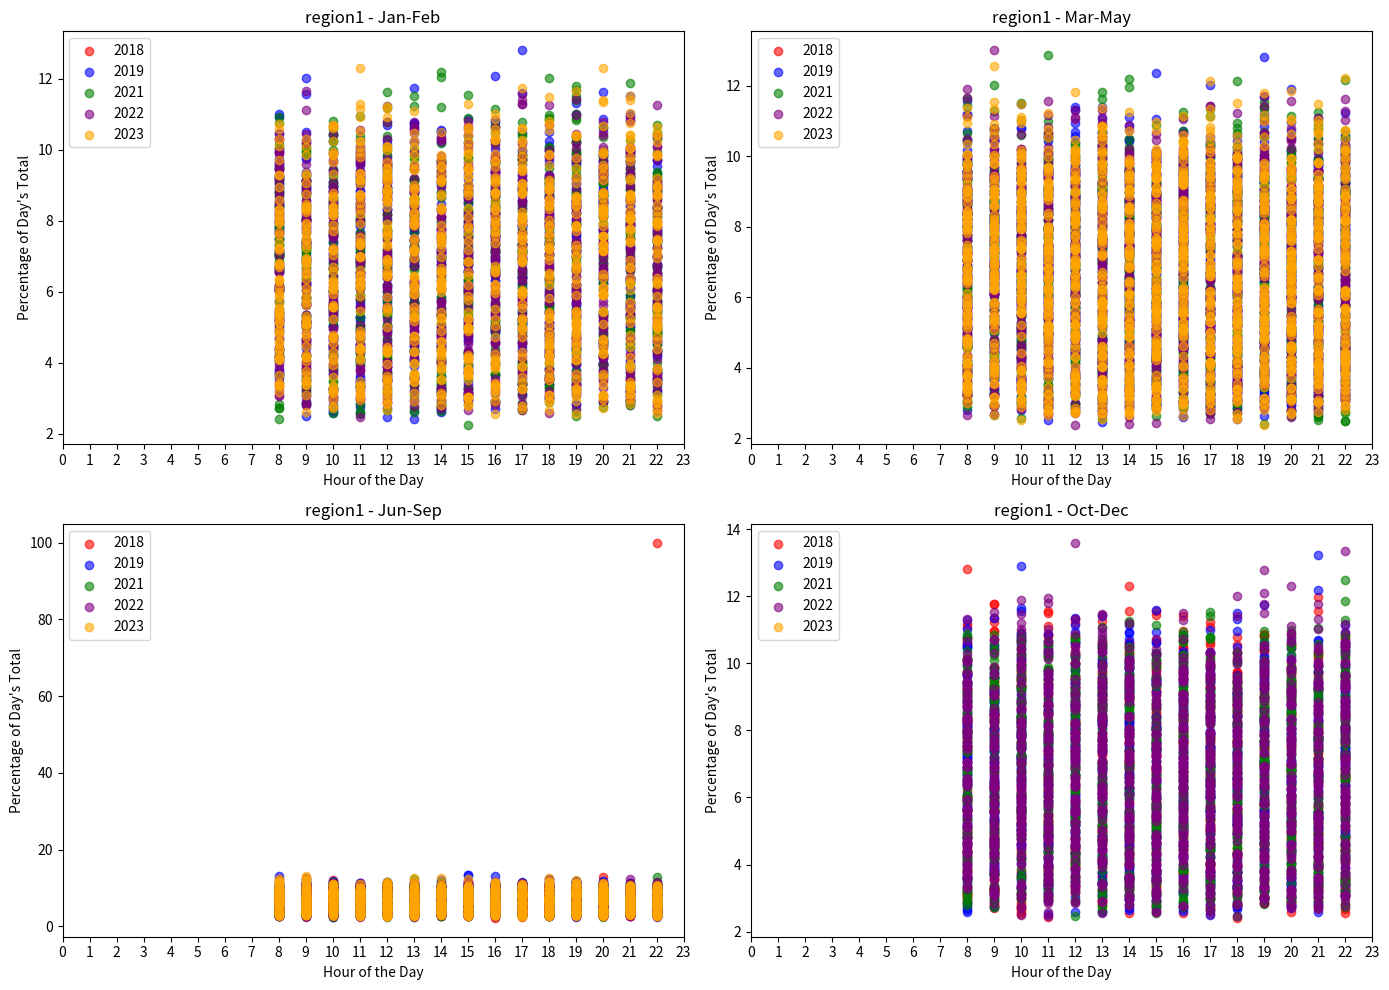

In [ ]:
def improved_plot_region_data(region_name, df):
    # Define month ranges for each graph
    month_ranges = [
        ('Jan-Feb', [1, 2]),
        ('Mar-May', [3, 4, 5]),
        ('Jun-Sep', [6, 7, 8, 9]),
        ('Oct-Dec', [10, 11, 12])
    ]
    # Define distinct colors for different years
    years = sorted(df.index.year.unique())
    colors = ['red', 'blue', 'green', 'purple', 'orange', 'cyan', 'magenta', 'yellow', 'black', 'grey']
    year_color_map = dict(zip(years, colors[:len(years)]))
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
    axes = axes.ravel()
    for i, (label, months) in enumerate(month_ranges):
        ax = axes[i]
        for year in years:
            subset = df[(df.index.year == year) & (df.index.month.isin(months))]
            # Calculate percentage of day's total for each hour
            daily_totals = subset.resample('D').sum()[region_name]
            hourly_percentage = (subset[region_name] / subset.index.to_series().dt.date.map(daily_totals)) * 100
            ax.scatter(subset.index.hour, hourly_percentage, label=str(year), color=year_color_map[year], alpha=0.6)
        ax.set_title(f'{region_name} - {label}')
        ax.set_xlabel('Hour of the Day')
        ax.set_ylabel('Percentage of Day\'s Total')
        ax.set_xticks(range(0, 24))
        ax.legend(loc='upper left')
    plt.tight_layout()
    plt.show()
# Test the improved function for region1
improved_plot_region_data('region1', filtered_df)

ValueError: Coefficient array is empty

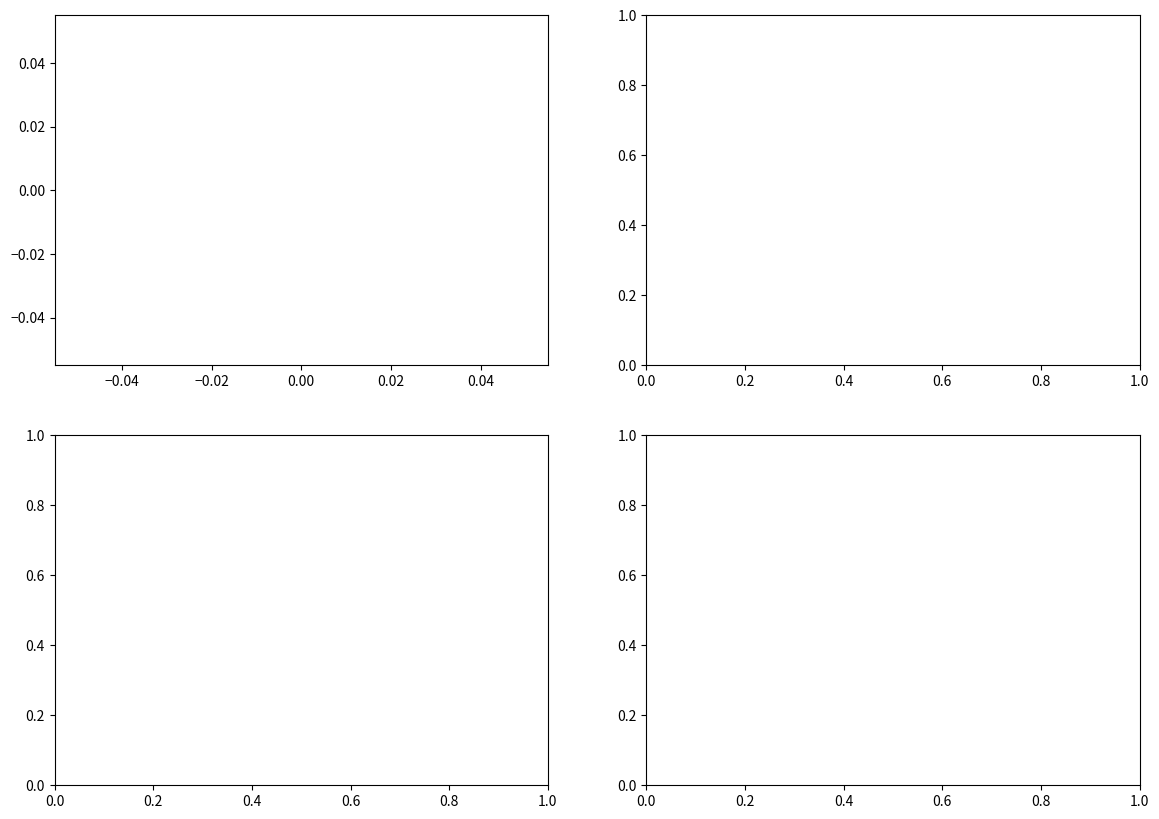

In [ ]:
from numpy.polynomial import Polynomial
def plot_with_regression(region_name, df):
    # Define month ranges for each graph
    month_ranges = [
        ('Jan-Feb', [1, 2]),
        ('Mar-May', [3, 4, 5]),
        ('Jun-Sep', [6, 7, 8, 9]),
        ('Oct-Dec', [10, 11, 12])
    ]
    # Define distinct colors for different years
    years = sorted(df.index.year.unique())
    colors = ['red', 'blue', 'green', 'purple', 'orange', 'cyan', 'magenta', 'yellow', 'black', 'grey']
    year_color_map = dict(zip(years, colors[:len(years)]))
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
    axes = axes.ravel()
    for i, (label, months) in enumerate(month_ranges):
        ax = axes[i]
        for year in years:
            subset = df[(df.index.year == year) & (df.index.month.isin(months))]
            # Calculate percentage of day's total for each hour
            daily_totals = subset.resample('D').sum()[region_name]
            hourly_percentage = (subset[region_name] / subset.index.to_series().dt.date.map(daily_totals)) * 100
            ax.scatter(subset.index.hour, hourly_percentage, label=str(year), color=year_color_map[year], alpha=0.6)
            # Quadratic regression
            p = Polynomial.fit(subset.index.hour, hourly_percentage, 2)
            ax.plot(*p.linspace(), color=year_color_map[year])
        ax.set_title(f'{region_name} - {label}')
        ax.set_xlabel('Hour of the Day')
        ax.set_ylabel('Percentage of Day\'s Total')
        ax.set_xticks(range(0, 24))
        ax.legend(loc='upper left')
    plt.tight_layout()
    plt.show()
# Test the function with regression for region1
plot_with_regression('region1', filtered_df)

In [ ]:
def improved_plot_with_regression(region_name, df):
    # Define month ranges for each graph
    month_ranges = [
        ('Jan-Feb', [1, 2]),
        ('Mar-May', [3, 4, 5]),
        ('Jun-Sep', [6, 7, 8, 9]),
        ('Oct-Dec', [10, 11, 12])
    ]
    # Define distinct colors for different years
    years = sorted(df.index.year.unique())
    colors = ['red', 'blue', 'green', 'purple', 'orange', 'cyan', 'magenta', 'yellow', 'black', 'grey']
    year_color_map = dict(zip(years, colors[:len(years)]))
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
    axes = axes.ravel()
    for i, (label, months) in enumerate(month_ranges):
        ax = axes[i]
        for year in years:
            subset = df[(df.index.year == year) & (df.index.month.isin(months))]
            # Calculate percentage of day's total for each hour
            daily_totals = subset.resample('D').sum()[region_name]
            hourly_percentage = (subset[region_name] / subset.index.to_series().dt.date.map(daily_totals)) * 100
            ax.scatter(subset.index.hour, hourly_percentage, label=str(year), color=year_color_map[year], alpha=0.6)
            # Quadratic regression
            if len(subset) > 2:  # Ensure we have enough data points for regression
                p = Polynomial.fit(subset.index.hour, hourly_percentage, 2)
                ax.plot(*p.linspace(), color=year_color_map[year])
        ax.set_title(f'{region_name} - {label}')
        ax.set_xlabel('Hour of the Day')
        ax.set_ylabel('Percentage of Day's Total')
        ax.set_xticks(range(0, 24))
        ax.legend(loc='upper left')
    plt.tight_layout()
    plt.show()
# Test the improved function with regression for region1
improved_plot_with_regression('region1', filtered_df)

SyntaxError: invalid syntax (3181920348.py, line 29)

In [ ]:
def improved_plot_with_regression(region_name, df):
    # Define month ranges for each graph
    month_ranges = [
        ('Jan-Feb', [1, 2]),
        ('Mar-May', [3, 4, 5]),
        ('Jun-Sep', [6, 7, 8, 9]),
        ('Oct-Dec', [10, 11, 12])
    ]
    # Define distinct colors for different years
    years = sorted(df.index.year.unique())
    colors = ['red', 'blue', 'green', 'purple', 'orange', 'cyan', 'magenta', 'yellow', 'black', 'grey']
    year_color_map = dict(zip(years, colors[:len(years)]))
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
    axes = axes.ravel()
    for i, (label, months) in enumerate(month_ranges):
        ax = axes[i]
        for year in years:
            subset = df[(df.index.year == year) & (df.index.month.isin(months))]
            # Calculate percentage of day's total for each hour
            daily_totals = subset.resample('D').sum()[region_name]
            hourly_percentage = (subset[region_name] / subset.index.to_series().dt.date.map(daily_totals)) * 100
            ax.scatter(subset.index.hour, hourly_percentage, label=str(year), color=year_color_map[year], alpha=0.6)
            # Quadratic regression
            if len(subset) > 2:  # Ensure we have enough data points for regression
                p = Polynomial.fit(subset.index.hour, hourly_percentage, 2)
                x, y = p.linspace()
                ax.plot(x, y, color=year_color_map[year])
        ax.set_title(f'{region_name} - {label}')
        ax.set_xlabel('Hour of the Day')
        ax.set_ylabel('Percentage of Day's Total')
        ax.set_xticks(range(0, 24))
        ax.legend(loc='upper left')
    plt.tight_layout()
    plt.show()
# Test the improved function with regression for region1
improved_plot_with_regression('region1', filtered_df)

SyntaxError: invalid syntax (959397819.py, line 30)

In [ ]:
def improved_plot_with_regression(region_name, df):
    # Define month ranges for each graph
    month_ranges = [
        ('Jan-Feb', [1, 2]),
        ('Mar-May', [3, 4, 5]),
        ('Jun-Sep', [6, 7, 8, 9]),
        ('Oct-Dec', [10, 11, 12])
    ]
    # Define distinct colors for different years
    years = sorted(df.index.year.unique())
    colors = ['red', 'blue', 'green', 'purple', 'orange', 'cyan', 'magenta', 'yellow', 'black', 'grey']
    year_color_map = dict(zip(years, colors[:len(years)]))
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
    axes = axes.ravel()
    for i, (label, months) in enumerate(month_ranges):
        ax = axes[i]
        for year in years:
            subset = df[(df.index.year == year) & (df.index.month.isin(months))]
            # Calculate percentage of day's total for each hour
            daily_totals = subset.resample('D').sum()[region_name]
            hourly_percentage = (subset[region_name] / subset.index.to_series().dt.date.map(daily_totals)) * 100
            ax.scatter(subset.index.hour, hourly_percentage, label=str(year), color=year_color_map[year], alpha=0.6)
            # Quadratic regression
            if len(subset) > 2:  # Ensure we have enough data points for regression
                p = Polynomial.fit(subset.index.hour, hourly_percentage, 2)
                x, y = p.linspace()
                ax.plot(x, y, color=year_color_map[year])
        ax.set_title(f'{region_name} - {label}')
        ax.set_xlabel('Hour of the Day')
        ax.set_ylabel('Percentage of Day's Total')
        ax.set_xticks(range(0, 24))
        ax.legend(loc='upper left')
    plt.tight_layout()
    plt.show()
# Test the improved function with regression for region1
improved_plot_with_regression('region1', filtered_df)

SyntaxError: invalid syntax (959397819.py, line 30)

In [ ]:
def improved_plot_with_regression(region_name, df):
    # Define month ranges for each graph
    month_ranges = [
        ('Jan-Feb', [1, 2]),
        ('Mar-May', [3, 4, 5]),
        ('Jun-Sep', [6, 7, 8, 9]),
        ('Oct-Dec', [10, 11, 12])
    ]
    # Define distinct colors for different years
    years = sorted(df.index.year.unique())
    colors = ['red', 'blue', 'green', 'purple', 'orange', 'cyan', 'magenta', 'yellow', 'black', 'grey']
    year_color_map = dict(zip(years, colors[:len(years)]))
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
    axes = axes.ravel()
    for i, (label, months) in enumerate(month_ranges):
        ax = axes[i]
        for year in years:
            subset = df[(df.index.year == year) & (df.index.month.isin(months))]
            # Calculate percentage of day's total for each hour
            daily_totals = subset.resample('D').sum()[region_name]
            hourly_percentage = (subset[region_name] / subset.index.to_series().dt.date.map(daily_totals)) * 100
            ax.scatter(subset.index.hour, hourly_percentage, label=str(year), color=year_color_map[year], alpha=0.6)
            # Quadratic regression
            if len(subset) > 2:  # Ensure we have enough data points for regression
                p = Polynomial.fit(subset.index.hour, hourly_percentage, 2)
                x, y = p.linspace()
                ax.plot(x, y, color=year_color_map[year])
        ax.set_title(f'{region_name} - {label}')
        ax.set_xlabel('Hour of the Day')
        ax.set_ylabel('Percentage of Day's Total')
        ax.set_xticks(range(0, 24))
        ax.legend(loc='upper left')
    plt.tight_layout()
    plt.show()
# Test the improved function with regression for region1
improved_plot_with_regression('region1', filtered_df)

SyntaxError: invalid syntax (959397819.py, line 30)

In [ ]:
def improved_plot_with_regression(region_name, df):
    # Define month ranges for each graph
    month_ranges = [
        ('Jan-Feb', [1, 2]),
        ('Mar-May', [3, 4, 5]),
        ('Jun-Sep', [6, 7, 8, 9]),
        ('Oct-Dec', [10, 11, 12])
    ]
    # Define distinct colors for different years
    years = sorted(df.index.year.unique())
    colors = ['red', 'blue', 'green', 'purple', 'orange', 'cyan', 'magenta', 'yellow', 'black', 'grey']
    year_color_map = dict(zip(years, colors[:len(years)]))
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
    axes = axes.ravel()
    for i, (label, months) in enumerate(month_ranges):
        ax = axes[i]
        for year in years:
            subset = df[(df.index.year == year) & (df.index.month.isin(months))]
            # Calculate percentage of day's total for each hour
            daily_totals = subset.resample('D').sum()[region_name]
            hourly_percentage = (subset[region_name] / subset.index.to_series().dt.date.map(daily_totals)) * 100
            ax.scatter(subset.index.hour, hourly_percentage, label=str(year), color=year_color_map[year], alpha=0.6)
            # Quadratic regression
            if len(subset) > 2:  # Ensure we have enough data points for regression
                p = Polynomial.fit(subset.index.hour, hourly_percentage, 2)
                x, y = p.linspace()
                ax.plot(x, y, color=year_color_map[year])
        ax.set_title(f'{region_name} - {label}')
        ax.set_xlabel('Hour of the Day')
        ax.set_ylabel('Percentage of Day's Total')
        ax.set_xticks(range(0, 24))
        ax.legend(loc='upper left')
    plt.tight_layout()
    plt.show()
# Test the improved function with regression for region1
improved_plot_with_regression('region1', filtered_df)

SyntaxError: invalid syntax (959397819.py, line 30)

In [ ]:
def improved_plot_with_regression(region_name, df):
    # Define month ranges for each graph
    month_ranges = [
        ('Jan-Feb', [1, 2]),
        ('Mar-May', [3, 4, 5]),
        ('Jun-Sep', [6, 7, 8, 9]),
        ('Oct-Dec', [10, 11, 12])
    ]
    # Define distinct colors for different years
    years = sorted(df.index.year.unique())
    colors = ['red', 'blue', 'green', 'purple', 'orange', 'cyan', 'magenta', 'yellow', 'black', 'grey']
    year_color_map = dict(zip(years, colors[:len(years)]))
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
    axes = axes.ravel()
    for i, (label, months) in enumerate(month_ranges):
        ax = axes[i]
        for year in years:
            subset = df[(df.index.year == year) & (df.index.month.isin(months))]
            # Calculate percentage of day's total for each hour
            daily_totals = subset.resample('D').sum()[region_name]
            hourly_percentage = (subset[region_name] / subset.index.to_series().dt.date.map(daily_totals)) * 100
            ax.scatter(subset.index.hour, hourly_percentage, label=str(year), color=year_color_map[year], alpha=0.6)
            # Quadratic regression
            if len(subset) > 2:  # Ensure we have enough data points for regression
                p = Polynomial.fit(subset.index.hour, hourly_percentage, 2)
                x, y = p.linspace()
                ax.plot(x, y, color=year_color_map[year])
        ax.set_title(f'{region_name} - {label}')
        ax.set_xlabel('Hour of the Day')
        ax.set_ylabel('Percentage of Day's Total')
        ax.set_xticks(range(0, 24))
        ax.legend(loc='upper left')
    plt.tight_layout()
    plt.show()

In [ ]:
# Plotting for each region
for region in ['region1', 'region2', 'region3', 'region4', 'region5']:
    improved_plot_with_regression(region, filtered_df)

NameError: name 'improved_plot_with_regression' is not defined

In [ ]:
# Run the improved function and then plot for each region
improved_plot_with_regression('region1', filtered_df)
improved_plot_with_regression('region2', filtered_df)
improved_plot_with_regression('region3', filtered_df)
improved_plot_with_regression('region4', filtered_df)
improved_plot_with_regression('region5', filtered_df)

NameError: name 'improved_plot_with_regression' is not defined

In [ ]:
def improved_plot_with_regression(region_name, df):
    # Define month ranges for each graph
    month_ranges = [
        ('Jan-Feb', [1, 2]),
        ('Mar-May', [3, 4, 5]),
        ('Jun-Sep', [6, 7, 8, 9]),
        ('Oct-Dec', [10, 11, 12])
    ]
    # Define distinct colors for different years
    years = sorted(df.index.year.unique())
    colors = ['red', 'blue', 'green', 'purple', 'orange', 'cyan', 'magenta', 'yellow', 'black', 'grey']
    year_color_map = dict(zip(years, colors[:len(years)]))
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
    axes = axes.ravel()
    for i, (label, months) in enumerate(month_ranges):
        ax = axes[i]
        for year in years:
            subset = df[(df.index.year == year) & (df.index.month.isin(months))]
            # Calculate percentage of day's total for each hour
            daily_totals = subset.resample('D').sum()[region_name]
            hourly_percentage = (subset[region_name] / subset.index.to_series().dt.date.map(daily_totals)) * 100
            ax.scatter(subset.index.hour, hourly_percentage, label=str(year), color=year_color_map[year], alpha=0.6)
            # Quadratic regression
            if len(subset) > 2:  # Ensure we have enough data points for regression
                p = Polynomial.fit(subset.index.hour, hourly_percentage, 2)
                x, y = p.linspace()
                ax.plot(x, y, color=year_color_map[year])
        ax.set_title(f'{region_name} - {label}')
        ax.set_xlabel('Hour of the Day')
        ax.set_ylabel('Percentage of Day's Total')
        ax.set_xticks(range(0, 24))
        ax.legend(loc='upper left')
    plt.tight_layout()
    plt.show()
# Now, plot for each region
improved_plot_with_regression('region1', filtered_df)
improved_plot_with_regression('region2', filtered_df)
improved_plot_with_regression('region3', filtered_df)
improved_plot_with_regression('region4', filtered_df)
improved_plot_with_regression('region5', filtered_df)

SyntaxError: invalid syntax (3424750837.py, line 30)

In [ ]:
from numpy.polynomial import Polynomial
def improved_plot_with_regression(region_name, df):
    # Define month ranges for each graph
    month_ranges = [
        ('Jan-Feb', [1, 2]),
        ('Mar-May', [3, 4, 5]),
        ('Jun-Sep', [6, 7, 8, 9]),
        ('Oct-Dec', [10, 11, 12])
    ]
    # Define distinct colors for different years
    years = sorted(df.index.year.unique())
    colors = ['red', 'blue', 'green', 'purple', 'orange', 'cyan', 'magenta', 'yellow', 'black', 'grey']
    year_color_map = dict(zip(years, colors[:len(years)]))
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
    axes = axes.ravel()
    for i, (label, months) in enumerate(month_ranges):
        ax = axes[i]
        for year in years:
            subset = df[(df.index.year == year) & (df.index.month.isin(months))]
            # Calculate percentage of day's total for each hour
            daily_totals = subset.resample('D').sum()[region_name]
            hourly_percentage = (subset[region_name] / subset.index.to_series().dt.date.map(daily_totals)) * 100
            ax.scatter(subset.index.hour, hourly_percentage, label=str(year), color=year_color_map[year], alpha=0.6)
            # Quadratic regression
            if len(subset) > 2:  # Ensure we have enough data points for regression
                p = Polynomial.fit(subset.index.hour, hourly_percentage, 2)
                x, y = p.linspace()
                ax.plot(x, y, color=year_color_map[year])
        ax.set_title(f'{region_name} - {label}')
        ax.set_xlabel('Hour of the Day')
        ax.set_ylabel('Percentage of Day's Total')
        ax.set_xticks(range(0, 24))
        ax.legend(loc='upper left')
    plt.tight_layout()
    plt.show()
# Now, plot for each region
improved_plot_with_regression('region1', filtered_df)
improved_plot_with_regression('region2', filtered_df)
improved_plot_with_regression('region3', filtered_df)
improved_plot_with_regression('region4', filtered_df)
improved_plot_with_regression('region5', filtered_df)

SyntaxError: invalid syntax (2801482230.py, line 31)

In [ ]:
from numpy.polynomial import Polynomial
def improved_plot_with_regression(region_name, df):
    # Define month ranges for each graph
    month_ranges = [
        ('Jan-Feb', [1, 2]),
        ('Mar-May', [3, 4, 5]),
        ('Jun-Sep', [6, 7, 8, 9]),
        ('Oct-Dec', [10, 11, 12])
    ]
    # Define distinct colors for different years
    years = sorted(df.index.year.unique())
    colors = ['red', 'blue', 'green', 'purple', 'orange', 'cyan', 'magenta', 'yellow', 'black', 'grey']
    year_color_map = dict(zip(years, colors[:len(years)]))
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
    axes = axes.ravel()
    for i, (label, months) in enumerate(month_ranges):
        ax = axes[i]
        for year in years:
            subset = df[(df.index.year == year) & (df.index.month.isin(months))]
            # Calculate percentage of day's total for each hour
            daily_totals = subset.resample('D').sum()[region_name]
            hourly_percentage = (subset[region_name] / subset.index.to_series().dt.date.map(daily_totals)) * 100
            ax.scatter(subset.index.hour, hourly_percentage, label=str(year), color=year_color_map[year], alpha=0.6)
            # Quadratic regression
            if len(subset) > 2:  # Ensure we have enough data points for regression
                p = Polynomial.fit(subset.index.hour, hourly_percentage, 2)
                x, y = p.linspace()
                ax.plot(x, y, color=year_color_map[year])
        ax.set_title(f'{region_name} - {label}')
        ax.set_xlabel('Hour of the Day')
        ax.set_ylabel('Percentage of Day's Total')
        ax.set_xticks(range(0, 24))
        ax.legend(loc='upper left')
    plt.tight_layout()
    plt.show()
# Now, plot for each region
improved_plot_with_regression('region1', filtered_df)

SyntaxError: invalid syntax (214706658.py, line 31)

In [ ]:
def plot_without_regression(region_name, df):
    # Define month ranges for each graph
    month_ranges = [
        ('Jan-Feb', [1, 2]),
        ('Mar-May', [3, 4, 5]),
        ('Jun-Sep', [6, 7, 8, 9]),
        ('Oct-Dec', [10, 11, 12])
    ]
    # Define distinct colors for different years
    years = sorted(df.index.year.unique())
    colors = ['red', 'blue', 'green', 'purple', 'orange', 'cyan', 'magenta', 'yellow', 'black', 'grey']
    year_color_map = dict(zip(years, colors[:len(years)]))
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
    axes = axes.ravel()
    for i, (label, months) in enumerate(month_ranges):
        ax = axes[i]
        for year in years:
            subset = df[(df.index.year == year) & (df.index.month.isin(months))]
            # Calculate percentage of day's total for each hour
            daily_totals = subset.resample('D').sum()[region_name]
            hourly_percentage = (subset[region_name] / subset.index.to_series().dt.date.map(daily_totals)) * 100
            ax.scatter(subset.index.hour, hourly_percentage, label=str(year), color=year_color_map[year], alpha=0.6)
        ax.set_title(f'{region_name} - {label}')
        ax.set_xlabel('Hour of the Day')
        ax.set_ylabel('Percentage of Day's Total')
        ax.set_xticks(range(0, 24))
        ax.legend(loc='upper left')
    plt.tight_layout()
    plt.show()
# Now, plot for each region without regression
plot_without_regression('region1', filtered_df)
plot_without_regression('region2', filtered_df)
plot_without_regression('region3', filtered_df)
plot_without_regression('region4', filtered_df)
plot_without_regression('region5', filtered_df)

SyntaxError: invalid syntax (1060680602.py, line 25)

In [ ]:
from numpy.polynomial import Polynomial
def improved_plot_with_regression(region_name, df):
    # Define month ranges for each graph
    month_ranges = [
        ('Jan-Feb', [1, 2]),
        ('Mar-May', [3, 4, 5]),
        ('Jun-Sep', [6, 7, 8, 9]),
        ('Oct-Dec', [10, 11, 12])
    ]
    # Define distinct colors for different years
    years = sorted(df.index.year.unique())
    colors = ['red', 'blue', 'green', 'purple', 'orange', 'cyan', 'magenta', 'yellow', 'black', 'grey']
    year_color_map = dict(zip(years, colors[:len(years)]))
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
    axes = axes.ravel()
    for i, (label, months) in enumerate(month_ranges):
        ax = axes[i]
        for year in years:
            subset = df[(df.index.year == year) & (df.index.month.isin(months))]
            # Calculate percentage of day's total for each hour
            daily_totals = subset.resample('D').sum()[region_name]
            hourly_percentage = (subset[region_name] / subset.index.to_series().dt.date.map(daily_totals)) * 100
            ax.scatter(subset.index.hour, hourly_percentage, label=str(year), color=year_color_map[year], alpha=0.6)
            # Quadratic regression
            if len(subset) > 2:  # Ensure we have enough data points for regression
                p = Polynomial.fit(subset.index.hour, hourly_percentage, 2)
                x, y = p.linspace()
                ax.plot(x, y, color=year_color_map[year])
        ax.set_title(f'{region_name} - {label}')
        ax.set_xlabel('Hour of the Day')
        ax.set_ylabel('Percentage of Day's Total')
        ax.set_xticks(range(0, 24))
        ax.legend(loc='upper left')
    plt.tight_layout()
    plt.show()
# Now, plot for region1 as a test
improved_plot_with_regression('region1', filtered_df)

SyntaxError: invalid syntax (676641769.py, line 31)

In [ ]:
def plot_without_regression(region_name, df):
    # Define month ranges for each graph
    month_ranges = [
        ('Jan-Feb', [1, 2]),
        ('Mar-May', [3, 4, 5]),
        ('Jun-Sep', [6, 7, 8, 9]),
        ('Oct-Dec', [10, 11, 12])
    ]
    # Define distinct colors for different years
    years = sorted(df.index.year.unique())
    colors = ['red', 'blue', 'green', 'purple', 'orange', 'cyan', 'magenta', 'yellow', 'black', 'grey']
    year_color_map = dict(zip(years, colors[:len(years)]))
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
    axes = axes.ravel()
    for i, (label, months) in enumerate(month_ranges):
        ax = axes[i]
        for year in years:
            subset = df[(df.index.year == year) & (df.index.month.isin(months))]
            # Calculate percentage of day's total for each hour
            daily_totals = subset.resample('D').sum()[region_name]
            hourly_percentage = (subset[region_name] / subset.index.to_series().dt.date.map(daily_totals)) * 100
            ax.scatter(subset.index.hour, hourly_percentage, label=str(year), color=year_color_map[year], alpha=0.6)
        ax.set_title(f'{region_name} - {label}')
        ax.set_xlabel('Hour of the Day')
        ax.set_ylabel('Percentage of Day's Total')
        ax.set_xticks(range(0, 24))
        ax.legend(loc='upper left')
    plt.tight_layout()
    plt.show()
# Now, plot for each region without regression
plot_without_regression('region1', filtered_df)
plot_without_regression('region2', filtered_df)
plot_without_regression('region3', filtered_df)
plot_without_regression('region4', filtered_df)
plot_without_regression('region5', filtered_df)

SyntaxError: invalid syntax (1060680602.py, line 25)

In [ ]:
def plot_without_regression(region_name, df):
    # Define month ranges for each graph
    month_ranges = [
        ('Jan-Feb', [1, 2]),
        ('Mar-May', [3, 4, 5]),
        ('Jun-Sep', [6, 7, 8, 9]),
        ('Oct-Dec', [10, 11, 12])
    ]
    # Define distinct colors for different years
    years = sorted(df.index.year.unique())
    colors = ['red', 'blue', 'green', 'purple', 'orange', 'cyan', 'magenta', 'yellow', 'black', 'grey']
    year_color_map = dict(zip(years, colors[:len(years)]))
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
    axes = axes.ravel()
    for i, (label, months) in enumerate(month_ranges):
        ax = axes[i]
        for year in years:
            subset = df[(df.index.year == year) & (df.index.month.isin(months))]
            # Calculate percentage of day's total for each hour
            daily_totals = subset.resample('D').sum()[region_name]
            hourly_percentage = (subset[region_name] / subset.index.to_series().dt.date.map(daily_totals)) * 100
            ax.scatter(subset.index.hour, hourly_percentage, label=str(year), color=year_color_map[year], alpha=0.6)
        ax.set_title(f'{region_name} - {label}')
        ax.set_xlabel('Hour of the Day')
        ax.set_ylabel('Percentage of Day's Total')
        ax.set_xticks(range(0, 24))
        ax.legend(loc='upper left')
    plt.tight_layout()
    plt.show()
# Now, plot for each region without regression
plot_without_regression('region1', filtered_df)
plot_without_regression('region2', filtered_df)
plot_without_regression('region3', filtered_df)
plot_without_regression('region4', filtered_df)
plot_without_regression('region5', filtered_df)

SyntaxError: invalid syntax (1060680602.py, line 25)

In [ ]:
def plot_without_regression(region_name, df):
    # Define month ranges for each graph
    month_ranges = [
        ('Jan-Feb', [1, 2]),
        ('Mar-May', [3, 4, 5]),
        ('Jun-Sep', [6, 7, 8, 9]),
        ('Oct-Dec', [10, 11, 12])
    ]
    # Define distinct colors for different years
    years = sorted(df.index.year.unique())
    colors = ['red', 'blue', 'green', 'purple', 'orange', 'cyan', 'magenta', 'yellow', 'black', 'grey']
    year_color_map = dict(zip(years, colors[:len(years)]))
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
    axes = axes.ravel()
    for i, (label, months) in enumerate(month_ranges):
        ax = axes[i]
        for year in years:
            subset = df[(df.index.year == year) & (df.index.month.isin(months))]
            # Calculate percentage of day's total for each hour
            daily_totals = subset.resample('D').sum()[region_name]
            hourly_percentage = (subset[region_name] / subset.index.to_series().dt.date.map(daily_totals)) * 100
            ax.scatter(subset.index.hour, hourly_percentage, label=str(year), color=year_color_map[year], alpha=0.6)
        ax.set_title(f'{region_name} - {label}')
        ax.set_xlabel('Hour of the Day')
        ax.set_ylabel('Percentage of Day's Total')
        ax.set_xticks(range(0, 24))
        ax.legend(loc='upper left')
    plt.tight_layout()
    plt.show()
# Now, plot for each region without regression
plot_without_regression('region1', filtered_df)
plot_without_regression('region2', filtered_df)
plot_without_regression('region3', filtered_df)
plot_without_regression('region4', filtered_df)
plot_without_regression('region5', filtered_df)

SyntaxError: invalid syntax (1060680602.py, line 25)

In [ ]:
def plot_without_regression(region_name, df):
    # Define month ranges for each graph
    month_ranges = [
        ('Jan-Feb', [1, 2]),
        ('Mar-May', [3, 4, 5]),
        ('Jun-Sep', [6, 7, 8, 9]),
        ('Oct-Dec', [10, 11, 12])
    ]
    # Define distinct colors for different years
    years = sorted(df.index.year.unique())
    colors = ['red', 'blue', 'green', 'purple', 'orange', 'cyan', 'magenta', 'yellow', 'black', 'grey']
    year_color_map = dict(zip(years, colors[:len(years)]))
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
    axes = axes.ravel()
    for i, (label, months) in enumerate(month_ranges):
        ax = axes[i]
        for year in years:
            subset = df[(df.index.year == year) & (df.index.month.isin(months))]
            # Calculate percentage of day's total for each hour
            daily_totals = subset.resample('D').sum()[region_name]
            hourly_percentage = (subset[region_name] / subset.index.to_series().dt.date.map(daily_totals)) * 100
            ax.scatter(subset.index.hour, hourly_percentage, label=str(year), color=year_color_map[year], alpha=0.6)
        ax.set_title(f'{region_name} - {label}')
        ax.set_xlabel('Hour of the Day')
        ax.set_ylabel('Percentage of Day's Total')
        ax.set_xticks(range(0, 24))
        ax.legend(loc='upper left')
    plt.tight_layout()
    plt.show()
# Now, plot for each region without regression
plot_without_regression('region1', filtered_df)
plot_without_regression('region2', filtered_df)
plot_without_regression('region3', filtered_df)
plot_without_regression('region4', filtered_df)
plot_without_regression('region5', filtered_df)

SyntaxError: invalid syntax (1060680602.py, line 25)

In [ ]:
def plot_without_regression(region_name, df):
    # Define month ranges for each graph
    month_ranges = [
        ('Jan-Feb', [1, 2]),
        ('Mar-May', [3, 4, 5]),
        ('Jun-Sep', [6, 7, 8, 9]),
        ('Oct-Dec', [10, 11, 12])
    ]
    # Define distinct colors for different years
    years = sorted(df.index.year.unique())
    colors = ['red', 'blue', 'green', 'purple', 'orange', 'cyan', 'magenta', 'yellow', 'black', 'grey']
    year_color_map = dict(zip(years, colors[:len(years)]))
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
    axes = axes.ravel()
    for i, (label, months) in enumerate(month_ranges):
        ax = axes[i]
        for year in years:
            subset = df[(df.index.year == year) & (df.index.month.isin(months))]
            # Calculate percentage of day's total for each hour
            daily_totals = subset.resample('D').sum()[region_name]
            hourly_percentage = (subset[region_name] / subset.index.to_series().dt.date.map(daily_totals)) * 100
            ax.scatter(subset.index.hour, hourly_percentage, label=str(year), color=year_color_map[year], alpha=0.6)
        ax.set_title(f'{region_name} - {label}')
        ax.set_xlabel('Hour of the Day')
        ax.set_ylabel('Percentage of Day's Total')
        ax.set_xticks(range(0, 24))
        ax.legend(loc='upper left')
    plt.tight_layout()
    plt.show()
# Now, plot for each region without regression
plot_without_regression('region1', filtered_df)
plot_without_regression('region2', filtered_df)
plot_without_regression('region3', filtered_df)
plot_without_regression('region4', filtered_df)
plot_without_regression('region5', filtered_df)

SyntaxError: invalid syntax (1060680602.py, line 25)

In [ ]:
def plot_without_regression(region_name, df):
    # Define month ranges for each graph
    month_ranges = [
        ('Jan-Feb', [1, 2]),
        ('Mar-May', [3, 4, 5]),
        ('Jun-Sep', [6, 7, 8, 9]),
        ('Oct-Dec', [10, 11, 12])
    ]
    # Define distinct colors for different years
    years = sorted(df.index.year.unique())
    colors = ['red', 'blue', 'green', 'purple', 'orange', 'cyan', 'magenta', 'yellow', 'black', 'grey']
    year_color_map = dict(zip(years, colors[:len(years)]))
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
    axes = axes.ravel()
    for i, (label, months) in enumerate(month_ranges):
        ax = axes[i]
        for year in years:
            subset = df[(df.index.year == year) & (df.index.month.isin(months))]
            # Calculate percentage of day's total for each hour
            daily_totals = subset.resample('D').sum()[region_name]
            hourly_percentage = (subset[region_name] / subset.index.to_series().dt.date.map(daily_totals)) * 100
            ax.scatter(subset.index.hour, hourly_percentage, label=str(year), color=year_color_map[year], alpha=0.6)
        ax.set_title(f'{region_name} - {label}')
        ax.set_xlabel('Hour of the Day')
        ax.set_ylabel('Percentage of Day's Total')
        ax.set_xticks(range(0, 24))
        ax.legend(loc='upper left')
    plt.tight_layout()
    plt.show()
# Now, plot for each region without regression
for region in ['region1', 'region2', 'region3', 'region4', 'region5']:
    plot_without_regression(region, filtered_df)

SyntaxError: invalid syntax (2844657349.py, line 25)